In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import time

from math import *

In [6]:
W=2*np.pi
dw=0.1
T=(2*np.pi)/W
n=15
L=n*T

N_grid=6000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))
d=0.25
dd=0.25

In [7]:
st=0
while (t[st]-T/2<0):
    st=st+1
fn=N_grid-1    
while (t[fn]+T/2>L):
    fn=fn-1
print(st, fn)

200 5799


In [8]:
jump_k=[]
jump_kC=[]
jump_kR=[]
jump_kR0=[]

for s in range(N_grid-2*p):
    start = time.time()
    k0=np.array([d]*N_grid)
    k0[2*p:2*p+s]=d+dd
    k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    
    init=np.arcsin(2*dw/k0[0])

    theta=[0]*N_grid
    for i in range(N_grid):
        if i==0:
            theta[i]=init
        else:
            k1=f(t[i-1], theta[i-1])*h
            k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
            k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
            k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
            theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
    theta=np.array(theta)

    x0=np.sin(W*t)
    y0=np.sin(W*t+theta)

    C_0=[0]*N_grid

    for i in range(N_grid):
        if (t[i]-T/2>=0) and (t[i]+T/2<=L):
            C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
        else:
            C_0[i]=nan
        
    phi0=np.arccos(C_0)
    k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))
    
    jump_k.append((k_hat[2*p+s]-d)/dd)
    jump_kC.append((max(np.array(k_hat[2*p+s:]))-d)/dd)
    jump_kR.append(np.sqrt(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/L)
#    jump_kR0.append(np.sqrt(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/(L*np.std(k0)))
    stop = time.time()
    print(s, stop-start)


0 2.7480902671813965
1 2.634326457977295
2 2.626368284225464
3 2.6902339458465576
4 2.73689603805542
5 2.622117757797241
6 2.8459198474884033
7 2.7299692630767822
8 2.7670676708221436
9 2.731466770172119
10 2.7523040771484375
11 2.596964120864868
12 2.6811671257019043
13 2.736922264099121
14 2.675846815109253
15 2.7091894149780273
16 2.63041353225708
17 2.696207046508789
18 2.6829473972320557
19 2.64742112159729
20 2.660799264907837
21 2.6549549102783203
22 2.634997606277466
23 2.632749080657959
24 2.657590866088867
25 2.683502435684204
26 2.737198829650879
27 2.7577524185180664
28 2.689312219619751
29 2.7535057067871094
30 2.7020585536956787
31 2.6238853931427
32 2.9656567573547363
33 2.6463959217071533
34 3.2722034454345703
35 3.3792407512664795
36 2.6582021713256836
37 2.9131693840026855
38 2.665925979614258
39 2.659872055053711
40 2.7688064575195312
41 2.6784889698028564
42 2.694868564605713
43 2.666703462600708
44 2.6785075664520264
45 2.6753926277160645
46 2.6539647579193115
47 2

370 2.6070094108581543
371 2.5907866954803467
372 2.6280126571655273
373 2.7944328784942627
374 2.6891582012176514
375 2.724289655685425
376 2.695202350616455
377 2.719627618789673
378 2.686892509460449
379 2.77805757522583
380 2.658033609390259
381 2.799210548400879
382 2.5692079067230225
383 2.766712188720703
384 2.639835834503174
385 2.6674020290374756
386 2.8667967319488525
387 2.6679887771606445
388 2.673779249191284
389 2.9544830322265625
390 2.7547481060028076
391 2.729107618331909
392 2.578676462173462
393 2.7241978645324707
394 2.642855405807495
395 2.7389416694641113
396 2.6095690727233887
397 2.588855266571045
398 2.7043848037719727
399 2.6537811756134033
400 2.6720523834228516
401 2.625297784805298
402 2.965127468109131
403 2.612518787384033
404 2.6260480880737305
405 2.641556739807129
406 2.6182987689971924
407 2.844261407852173
408 2.7465147972106934
409 2.9714279174804688
410 2.923046588897705
411 2.726402997970581
412 2.6827101707458496
413 2.6491200923919678
414 2.7264

734 3.0107202529907227
735 2.8546040058135986
736 2.6252033710479736
737 2.6013190746307373
738 2.574641704559326
739 2.6735353469848633
740 2.7723889350891113
741 2.688229560852051
742 2.6596765518188477
743 2.7973616123199463
744 2.639742612838745
745 2.668761730194092
746 2.6275041103363037
747 2.61579966545105
748 2.7195544242858887
749 2.600008487701416
750 2.629687786102295
751 2.604051113128662
752 2.630925178527832
753 2.64190411567688
754 2.580570697784424
755 2.5949957370758057
756 2.5399131774902344
757 2.599578619003296
758 2.551366090774536
759 2.59401273727417
760 2.5561437606811523
761 2.5960569381713867
762 2.5915019512176514
763 2.600895643234253
764 2.555514097213745
765 2.640324354171753
766 2.560760736465454
767 2.5794897079467773
768 2.5636367797851562
769 2.589641809463501
770 2.576127529144287
771 2.582044839859009
772 2.57535457611084
773 2.550306558609009
774 2.6024250984191895
775 2.5644514560699463
776 2.608841896057129
777 2.638613224029541
778 2.66790366172

1094 2.832277297973633
1095 2.680851936340332
1096 2.5963165760040283
1097 2.571214437484741
1098 2.5879740715026855
1099 2.6837282180786133
1100 2.6579389572143555
1101 2.921088695526123
1102 2.628951072692871
1103 2.63995361328125
1104 2.707218647003174
1105 2.6388633251190186
1106 2.607191801071167
1107 2.5779523849487305
1108 2.598544120788574
1109 2.6357600688934326
1110 2.6438257694244385
1111 2.609313726425171
1112 2.6245200634002686
1113 2.5891151428222656
1114 2.6422007083892822
1115 2.614900588989258
1116 2.6037280559539795
1117 2.622521162033081
1118 2.5948712825775146
1119 2.693147897720337
1120 2.6760616302490234
1121 2.9119629859924316
1122 2.8486647605895996
1123 2.8714075088500977
1124 2.7832727432250977
1125 2.920314073562622
1126 2.705824613571167
1127 2.676455020904541
1128 2.582656145095825
1129 2.5830044746398926
1130 2.6386494636535645
1131 2.6260433197021484
1132 2.5745978355407715
1133 2.606315851211548
1134 2.573338270187378
1135 2.585674524307251
1136 2.817677

1443 2.554487943649292
1444 2.6107964515686035
1445 2.5655429363250732
1446 2.5699522495269775
1447 2.5860424041748047
1448 2.561007022857666
1449 2.584629774093628
1450 2.533271312713623
1451 2.5672733783721924
1452 2.5412464141845703
1453 2.5494234561920166
1454 2.5554556846618652
1455 2.559915542602539
1456 2.5581884384155273
1457 2.5710887908935547
1458 2.5531771183013916
1459 2.5293374061584473
1460 2.542804002761841
1461 2.54544734954834
1462 2.5382022857666016
1463 2.5260190963745117
1464 2.514967918395996
1465 2.590461254119873
1466 2.5954036712646484
1467 2.5409231185913086
1468 2.546309471130371
1469 2.5480010509490967
1470 2.545574426651001
1471 2.543586492538452
1472 2.5593016147613525
1473 2.5302674770355225
1474 2.5385031700134277
1475 2.5460615158081055
1476 2.5977039337158203
1477 2.5369789600372314
1478 2.5401527881622314
1479 2.522883653640747
1480 2.522993803024292
1481 2.571068286895752
1482 2.582778215408325
1483 2.9430532455444336
1484 2.5459468364715576
1485 2.55

1793 3.5316901206970215
1794 3.2327187061309814
1795 3.452744245529175
1796 2.8964345455169678
1797 3.023012638092041
1798 3.3600382804870605
1799 2.849370002746582
1800 3.0762455463409424
1801 3.0056190490722656
1802 2.6952595710754395
1803 2.8874566555023193
1804 2.799497604370117
1805 2.8743038177490234
1806 2.847153902053833
1807 2.812148332595825
1808 2.590421438217163
1809 2.667405366897583
1810 2.6748812198638916
1811 2.5953452587127686
1812 2.5270180702209473
1813 2.5606977939605713
1814 2.5697827339172363
1815 2.615807294845581
1816 2.6998186111450195
1817 2.6050708293914795
1818 2.552640199661255
1819 2.5739734172821045
1820 2.625466823577881
1821 2.934776782989502
1822 2.723068952560425
1823 2.606267213821411
1824 2.6467466354370117
1825 2.6388211250305176
1826 2.9244940280914307
1827 2.814100980758667
1828 2.7884082794189453
1829 2.6143953800201416
1830 2.7172937393188477
1831 2.8397023677825928
1832 2.7574708461761475
1833 2.6490533351898193
1834 2.7028024196624756
1835 2.

2142 2.552495002746582
2143 2.6145803928375244
2144 2.5409698486328125
2145 2.5644166469573975
2146 2.5977396965026855
2147 2.574887990951538
2148 2.6097593307495117
2149 2.5593576431274414
2150 2.618429660797119
2151 2.536778688430786
2152 2.5715813636779785
2153 2.5344126224517822
2154 2.5668370723724365
2155 2.624817371368408
2156 2.5487682819366455
2157 2.534879207611084
2158 2.5716729164123535
2159 2.569078207015991
2160 2.791130304336548
2161 2.7792789936065674
2162 2.683637857437134
2163 2.816160202026367
2164 2.7890985012054443
2165 2.5492305755615234
2166 2.5422725677490234
2167 2.576322555541992
2168 2.561967611312866
2169 2.5153656005859375
2170 2.5271310806274414
2171 2.5793800354003906
2172 2.5237958431243896
2173 2.6968772411346436
2174 2.7611091136932373
2175 2.829808235168457
2176 2.6077780723571777
2177 2.526463747024536
2178 2.597761869430542
2179 2.7777745723724365
2180 2.695917844772339
2181 2.5887179374694824
2182 2.6864476203918457
2183 2.6481990814208984
2184 2.6

2491 2.6030616760253906
2492 2.5422346591949463
2493 2.6432197093963623
2494 2.5426721572875977
2495 2.6222245693206787
2496 2.5165367126464844
2497 2.5951650142669678
2498 2.5992074012756348
2499 2.5308780670166016
2500 2.5333218574523926
2501 2.5925979614257812
2502 2.5598552227020264
2503 2.6661911010742188
2504 2.529348611831665
2505 2.5294926166534424
2506 2.5568246841430664
2507 2.539050340652466
2508 2.5767459869384766
2509 2.653446674346924
2510 2.5403175354003906
2511 2.694572925567627
2512 2.686511278152466
2513 2.711544990539551
2514 2.866147041320801
2515 2.7340550422668457
2516 2.644192934036255
2517 2.5412144660949707
2518 2.5781710147857666
2519 2.5831589698791504
2520 2.5811285972595215
2521 2.5925514698028564
2522 2.601255416870117
2523 2.5236058235168457
2524 2.508028984069824
2525 2.5170505046844482
2526 2.5311102867126465
2527 2.5624947547912598
2528 2.530629873275757
2529 2.5348103046417236
2530 2.5368340015411377
2531 2.5961246490478516
2532 2.634678363800049
2533

2841 2.5616676807403564
2842 2.6011459827423096
2843 2.537369728088379
2844 2.530217170715332
2845 2.604780912399292
2846 2.5756657123565674
2847 2.5477242469787598
2848 2.537327527999878
2849 2.5761709213256836
2850 2.5399117469787598
2851 2.561840295791626
2852 2.544243812561035
2853 2.5841667652130127
2854 2.567147970199585
2855 2.553485155105591
2856 2.5357913970947266
2857 2.5761020183563232
2858 2.5160574913024902
2859 2.535921335220337
2860 2.614431858062744
2861 2.547398090362549
2862 2.549406051635742
2863 2.5536038875579834
2864 2.7786858081817627
2865 2.755779504776001
2866 2.7236366271972656
2867 2.5640451908111572
2868 2.5588796138763428
2869 2.5684313774108887
2870 2.558946132659912
2871 2.5441529750823975
2872 2.5840446949005127
2873 2.559723377227783
2874 2.5687859058380127
2875 2.5317723751068115
2876 2.5582237243652344
2877 2.557094097137451
2878 2.5536789894104004
2879 2.5997202396392822
2880 2.539935827255249
2881 2.5317368507385254
2882 2.5460455417633057
2883 2.52

3191 2.5312016010284424
3192 2.541436195373535
3193 2.5315139293670654
3194 2.545907497406006
3195 2.535989284515381
3196 2.59734845161438
3197 2.5642893314361572
3198 2.5587453842163086
3199 2.5266458988189697
3200 2.5546059608459473
3201 2.5408575534820557
3202 2.5287747383117676
3203 2.545825719833374
3204 2.576657772064209
3205 2.7329208850860596
3206 2.5480217933654785
3207 2.5253922939300537
3208 2.553489923477173
3209 2.546037197113037
3210 2.526442527770996
3211 2.581052780151367
3212 2.583322286605835
3213 2.587465286254883
3214 2.5513243675231934
3215 2.5491979122161865
3216 2.6403841972351074
3217 2.5272202491760254
3218 2.532353401184082
3219 2.6062004566192627
3220 2.5344836711883545
3221 2.5422873497009277
3222 2.5813796520233154
3223 2.533856153488159
3224 2.5446979999542236
3225 2.527390956878662
3226 2.5637218952178955
3227 2.559539794921875
3228 2.5579123497009277
3229 2.5427334308624268
3230 2.5656914710998535
3231 2.5660910606384277
3232 2.5354785919189453
3233 2.59

3540 2.5672109127044678
3541 2.543762683868408
3542 2.547438383102417
3543 2.5585684776306152
3544 2.580660343170166
3545 2.529642105102539
3546 2.563046455383301
3547 2.5667741298675537
3548 2.640852928161621
3549 2.543890953063965
3550 2.5490353107452393
3551 2.562828779220581
3552 2.557358980178833
3553 2.5788583755493164
3554 2.602877140045166
3555 2.5632550716400146
3556 2.523425579071045
3557 2.5473103523254395
3558 2.5522592067718506
3559 2.5284180641174316
3560 2.5749478340148926
3561 2.609253406524658
3562 2.564671039581299
3563 2.5536153316497803
3564 2.535996198654175
3565 2.561426877975464
3566 2.5490875244140625
3567 2.543593406677246
3568 2.5294289588928223
3569 2.515185832977295
3570 2.672308921813965
3571 2.5220117568969727
3572 2.529719114303589
3573 2.5513627529144287
3574 2.509546995162964
3575 2.5296359062194824
3576 2.5613510608673096
3577 2.5573694705963135
3578 2.5230960845947266
3579 2.5907232761383057
3580 2.56563663482666
3581 2.548668146133423
3582 2.53544950

3890 2.5371124744415283
3891 2.5377423763275146
3892 2.569072961807251
3893 2.5681421756744385
3894 2.5308220386505127
3895 2.550503730773926
3896 2.5150885581970215
3897 2.5300581455230713
3898 2.5371315479278564
3899 2.5549917221069336
3900 2.5236449241638184
3901 2.6076788902282715
3902 2.578286647796631
3903 2.5457026958465576
3904 2.577071189880371
3905 2.528527021408081
3906 2.549182176589966
3907 2.522552251815796
3908 2.579153299331665
3909 2.538043737411499
3910 2.5334889888763428
3911 2.5991618633270264
3912 2.5312697887420654
3913 2.5393755435943604
3914 2.6137402057647705
3915 2.5302627086639404
3916 2.549793004989624
3917 2.5499579906463623
3918 2.5453240871429443
3919 2.5495784282684326
3920 2.539029598236084
3921 2.5510287284851074
3922 2.5342605113983154
3923 2.552380084991455
3924 2.6075448989868164
3925 2.602024793624878
3926 2.5675415992736816
3927 2.5440685749053955
3928 2.59800386428833
3929 2.5365047454833984
3930 2.5756423473358154
3931 2.6938705444335938
3932 2.

4238 2.562870740890503
4239 2.5710434913635254
4240 2.5284640789031982
4241 2.5245039463043213
4242 2.589364767074585
4243 2.585062026977539
4244 2.5369601249694824
4245 2.5435068607330322
4246 2.5243847370147705
4247 2.5228748321533203
4248 2.5317299365997314
4249 2.5683860778808594
4250 2.5472350120544434
4251 2.53684401512146
4252 2.5231711864471436
4253 2.700129985809326
4254 2.5555217266082764
4255 2.577787160873413
4256 2.550839900970459
4257 2.5819196701049805
4258 2.5288445949554443
4259 2.527575969696045
4260 2.562525749206543
4261 2.5862209796905518
4262 2.5700128078460693
4263 2.537841320037842
4264 2.578277826309204
4265 2.584885358810425
4266 2.5181832313537598
4267 2.559091806411743
4268 2.5417275428771973
4269 2.5361404418945312
4270 2.541628360748291
4271 2.5450966358184814
4272 2.551917791366577
4273 2.60135555267334
4274 2.530759572982788
4275 2.540220260620117
4276 2.581723928451538
4277 2.5594584941864014
4278 2.5285027027130127
4279 2.7312943935394287
4280 2.700691

4587 2.5729660987854004
4588 2.591285228729248
4589 2.5416603088378906
4590 2.5632412433624268
4591 2.5763278007507324
4592 2.5470540523529053
4593 2.5342626571655273
4594 2.556061267852783
4595 2.538735866546631
4596 2.5978071689605713
4597 2.5334062576293945
4598 2.5412418842315674
4599 2.52260422706604
4600 2.577263593673706
4601 2.5410914421081543
4602 2.5479636192321777
4603 2.546666145324707
4604 2.5565028190612793
4605 2.558521032333374
4606 2.549358367919922
4607 2.5386366844177246
4608 2.8664231300354004
4609 2.5231149196624756
4610 2.5901856422424316
4611 2.551384925842285
4612 2.5344314575195312
4613 2.5296199321746826
4614 2.5688886642456055
4615 2.5365638732910156
4616 2.517237424850464
4617 2.579996109008789
4618 2.6164894104003906
4619 2.534130811691284
4620 2.572925567626953
4621 2.6150732040405273
4622 2.581166982650757
4623 2.545098304748535
4624 2.558868646621704
4625 2.572492837905884
4626 2.5574851036071777
4627 2.542525291442871
4628 2.555644989013672
4629 2.57072

4936 2.532648801803589
4937 2.530416250228882
4938 2.5376622676849365
4939 2.5396997928619385
4940 2.517535924911499
4941 2.548021078109741
4942 2.550912857055664
4943 2.547539710998535
4944 2.540332555770874
4945 2.5648605823516846
4946 2.56990909576416
4947 2.5282068252563477
4948 2.5536420345306396
4949 2.530106544494629
4950 2.584296226501465
4951 2.530432939529419
4952 2.636937379837036
4953 2.5400166511535645
4954 2.577903985977173
4955 2.5339348316192627
4956 2.554229974746704
4957 2.543489933013916
4958 2.5523202419281006
4959 2.530244827270508
4960 2.5928351879119873
4961 2.564070224761963
4962 2.52825665473938
4963 2.5355618000030518
4964 2.5660946369171143
4965 2.572633743286133
4966 2.5814085006713867
4967 2.5409278869628906
4968 2.5369365215301514
4969 2.534696102142334
4970 2.5434176921844482
4971 2.571009635925293
4972 2.551870346069336
4973 2.5192601680755615
4974 2.5628838539123535
4975 2.5469419956207275
4976 2.522531270980835
4977 2.528473138809204
4978 2.55226540565

In [9]:
np.savetxt('PT1806_15_6000_k.out', jump_k, delimiter=',')
np.savetxt('PT1806_15_6000_kC.out', jump_kC, delimiter=',')
np.savetxt('PT1806_15_6000_kR.out', jump_kR, delimiter=',')

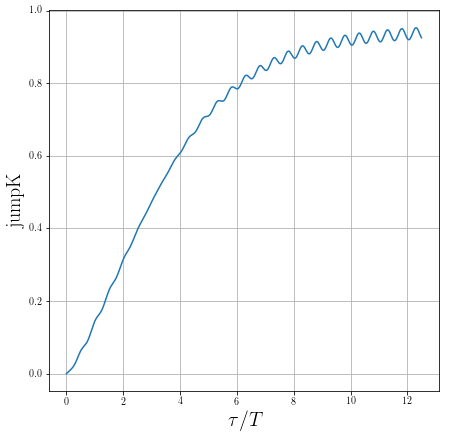

In [10]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_k)
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpK', fontsize=20)
plt.show()

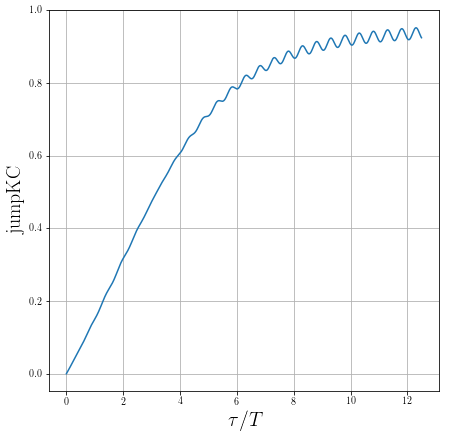

In [11]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_kC)
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpKC', fontsize=20)
plt.show()

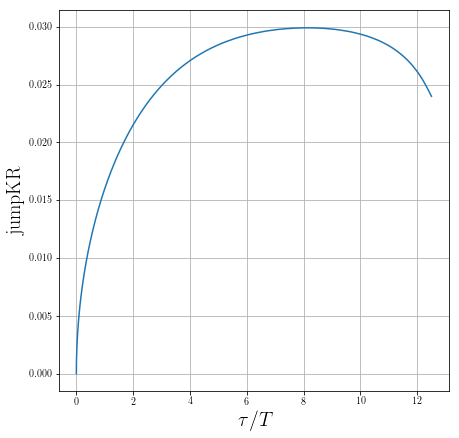

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p-st)), jump_kR[:N_grid-2*p-st])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpKR', fontsize=20)
plt.show()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


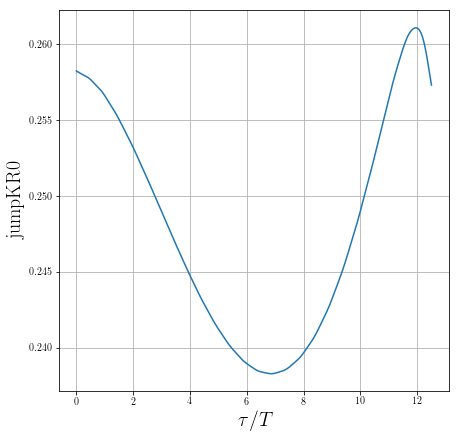

In [13]:
sk=[]
for s in range(N_grid-2*p):
    k0=np.array([d]*N_grid)
    k0[2*p:2*p+s]=d+dd
    sk.append(np.std(k0))

jump_kR0=np.divide(jump_kR, sk)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p-st)), jump_kR0[:N_grid-2*p-st])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.ylabel(r'jumpKR0', fontsize=20)
plt.show()

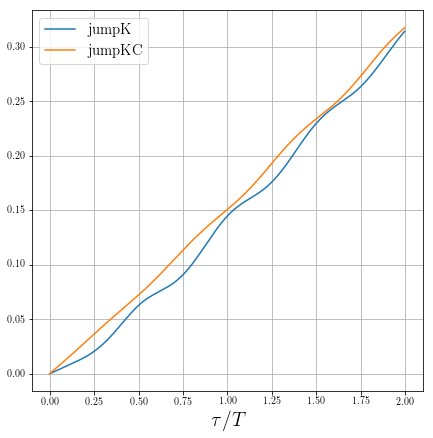

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(2*p)), jump_k[:2*p])
plt.plot(1/p*np.array(range(2*p)), jump_kC[:2*p])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.legend(['jumpK', 'jumpKC'], fontsize=15)
#plt.ylabel(r'jumpKR0', fontsize=20)
plt.show()

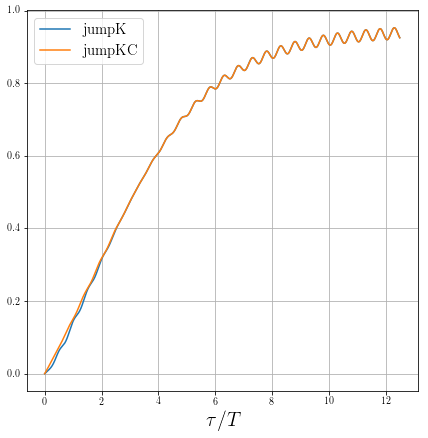

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,7))
plt.grid('on')
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_k[:])
plt.plot(1/p*np.array(range(N_grid-2*p)), jump_kC[:])
plt.xlabel(r'{ \tau }/{ T }', fontsize=20)
plt.legend(['jumpK', 'jumpKC'], fontsize=15)
#plt.ylabel(r'jumpKR0', fontsize=20)
plt.show()